In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings

In [275]:
df=pd.read_csv(r"C:\Users\91900\Downloads\Credit_Sructured.csv")
df.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_inMonths,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
3,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
4,5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [276]:
df.describe()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_inMonths,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,89375.000000,89375.000000,8.937500e+04,75935.000000,89375.000000,89375.000000,89375.000000,89375.000000,89375.000000,83068.000000,87504.000000,87612.000000,89375.00000,89375.000000,81268.000000,89375.000000,85397.000000,8.828700e+04
mean,49950.439485,33.320190,1.766142e+05,4198.002217,5.372095,5.533684,14.538987,7.321835,21.106663,14.164287,10.474424,5.789287,1426.44855,32.284359,221.188044,1401.582178,635.885065,3.398009e+22
std,28863.589707,10.790182,1.429674e+06,3185.096743,2.590760,2.063573,8.745885,18.868837,14.830438,24.300242,6.678936,3.878470,1156.40474,5.117280,99.844330,8291.680639,2039.884992,3.365363e+24
min,0.000000,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.23000,20.000000,1.000000,0.000000,0.000000,7.759665e-03
25%,24918.500000,24.000000,1.945549e+04,1626.047500,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.350000,3.000000,565.23000,28.053260,144.000000,30.403233,74.435932,2.702460e+02
50%,49899.000000,33.000000,3.757975e+04,3096.836667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,5.000000,1165.77000,32.297831,219.000000,69.201730,135.732211,3.368227e+02
75%,74968.500000,42.000000,7.284956e+04,5967.748333,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.890000,8.000000,1945.67000,36.500298,302.000000,161.340704,265.706212,4.701009e+02
max,99998.000000,100.000000,2.419806e+07,15204.633330,18.000000,10.000000,34.000000,100.000000,67.000000,996.000000,36.970000,46.000000,4998.07000,50.000000,404.000000,82331.000000,10000.000000,3.333333e+26


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89375 entries, 0 to 89374
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   89375 non-null  int64  
 1   ID                           89375 non-null  object 
 2   Customer_ID                  89375 non-null  object 
 3   Month                        89375 non-null  object 
 4   Name                         80435 non-null  object 
 5   Age                          89375 non-null  int64  
 6   SSN                          89375 non-null  object 
 7   Occupation                   89375 non-null  object 
 8   Annual_Income                89375 non-null  float64
 9   Monthly_Inhand_Salary        75935 non-null  float64
 10  Num_Bank_Accounts            89375 non-null  int64  
 11  Num_Credit_Card              89375 non-null  int64  
 12  Interest_Rate                89375 non-null  int64  
 13  Num_of_Loan     

In [278]:
#Missing values

In [279]:
x=df['Monthly_Inhand_Salary'].mean()
df['Monthly_Inhand_Salary'].fillna(x,inplace=True)

In [280]:
y=df['Type_of_Loan'].mode()[0]
df['Type_of_Loan'].fillna(y,inplace=True)

In [281]:
df.dropna(subset=['Num_of_Delayed_Payment'], inplace = True)

In [282]:
z=df['Num_Credit_Inquiries'].mode()[0]
df['Num_Credit_Inquiries'].fillna(z,inplace=True)

In [283]:
x=df['Credit_History_Age_inMonths'].mode()[0]
df['Credit_History_Age_inMonths'].fillna(x,inplace=True)

In [284]:
x=df['Amount_invested_monthly'].mean()
df['Amount_invested_monthly'].fillna(x,inplace=True)

In [285]:
y=df['Monthly_Balance'].mean()
df['Monthly_Balance'].fillna(y,inplace=True)

In [286]:
y=df['Changed_Credit_Limit'].mean()
df['Changed_Credit_Limit'].fillna(y,inplace=True)

In [287]:
x=df['Credit_Mix'].mode()[0]
df['Credit_Mix'].fillna(x,inplace=True)

In [288]:
df.isnull().sum()

Unnamed: 0                        0
ID                                0
Customer_ID                       0
Month                             0
Name                           8314
Age                               0
SSN                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                      0
Delay_from_due_date               0
Num_of_Delayed_Payment            0
Changed_Credit_Limit              0
Num_Credit_Inquiries              0
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age_inMonths       0
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly           0
Payment_Behaviour                 0
Monthly_Balance             

In [289]:
#Treating Outliers

In [290]:
percentile=df['Age'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.0]=percentile[0.99]
df.loc[df['Age']>percentile[0.99],'Age']=percentile[0.99]

In [291]:
percentile=df['Annual_Income'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.0]=percentile[0.99]
df.loc[df['Annual_Income']>percentile[0.99],'Annual_Income']=percentile[0.99]

In [292]:
percentile=df['Num_of_Loan'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[0.99]=percentile[0.95]
df.loc[df['Num_of_Loan']>percentile[0.95],'Num_of_Loan']=percentile[0.95]

In [293]:
percentile=df['Num_of_Delayed_Payment'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.00]=percentile[0.99]
df.loc[df['Num_of_Delayed_Payment']>percentile[0.99],'Num_of_Delayed_Payment']=percentile[0.99]

In [294]:
percentile=df['Num_Credit_Inquiries'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.00]=percentile[0.99]
df.loc[df['Num_Credit_Inquiries']>percentile[0.99],'Num_Credit_Inquiries']=percentile[0.99]

In [295]:
percentile=df['Total_EMI_per_month'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.00]=percentile[0.95]
df.loc[df['Total_EMI_per_month']>percentile[0.95],'Total_EMI_per_month']=percentile[0.95]

In [296]:
percentile=df['Amount_invested_monthly'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile[1.00]=percentile[0.95]
df.loc[df['Amount_invested_monthly']>percentile[0.95],'Amount_invested_monthly']=percentile[0.95]

In [297]:
percentile=df['Monthly_Balance'].quantile([0.0,0.25,0.50,0.75,0.95,0.99,1.0])
percentile

0.00    7.759665e-03
0.25    2.710055e+02
0.50    3.387860e+02
0.75    4.782300e+02
0.95    9.188042e+02
0.99    3.655372e+22
1.00    3.333333e+26
Name: Monthly_Balance, dtype: float64

In [298]:
percentile[1.00]=percentile[0.95]
df.loc[df['Monthly_Balance']>percentile[0.95],'Monthly_Balance']=percentile[0.95]

In [299]:
#Squareroot Transformation

In [300]:
'''''
'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                                  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'   '''

"''\n'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', \n                                  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',\n                                  'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'   "

In [301]:
from scipy.stats import skew
skewness=skew(df['Monthly_Balance'])
print(skewness)

1.1445992351779912


In [302]:
df['Annual_Income']=np.sqrt(df['Annual_Income'])
skewness=skew(df['Annual_Income'])
print(skewness)

0.5830756396979558


In [303]:
df['Monthly_Inhand_Salary']=np.sqrt(df['Monthly_Inhand_Salary'])
skewness=skew(df['Monthly_Inhand_Salary'])
print(skewness)

0.4732338607011785


In [304]:
df['Num_Credit_Card']=np.sqrt(df['Num_Credit_Card'])
skewness=skew(df['Num_Credit_Card'])
print(skewness)

-0.3517991361678269


In [305]:
df['Interest_Rate']=np.sqrt(df['Interest_Rate'])
skewness=skew(df['Interest_Rate'])
print(skewness)

-0.10344673210591038


In [306]:
df['Delay_from_due_date']=np.sqrt(df['Delay_from_due_date'])
skewness=skew(df['Delay_from_due_date'])
print(skewness)

0.10015743698479868


In [307]:
df['Changed_Credit_Limit']=np.sqrt(df['Changed_Credit_Limit'])
skewness=skew(df['Changed_Credit_Limit'])
print(skewness)

-0.0731251754890903


In [308]:
df['Outstanding_Debt']=np.sqrt(df['Outstanding_Debt'])
skewness=skew(df['Outstanding_Debt'])
print(skewness)

0.3186280876563508


In [309]:
df['Amount_invested_monthly']=np.sqrt(df['Amount_invested_monthly'])
skewness=skew(df['Amount_invested_monthly'])
print(skewness)

1.0349867775828905


In [310]:
df['Monthly_Balance']=np.sqrt(df['Monthly_Balance'])
skewness=skew(df['Monthly_Balance'])
print(skewness)

0.49141150048425847


In [311]:
#EDA

In [312]:
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age_inMonths', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

C:\Users\91900\AppData\Local\Temp/ipykernel_9864/2886370110.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax1)


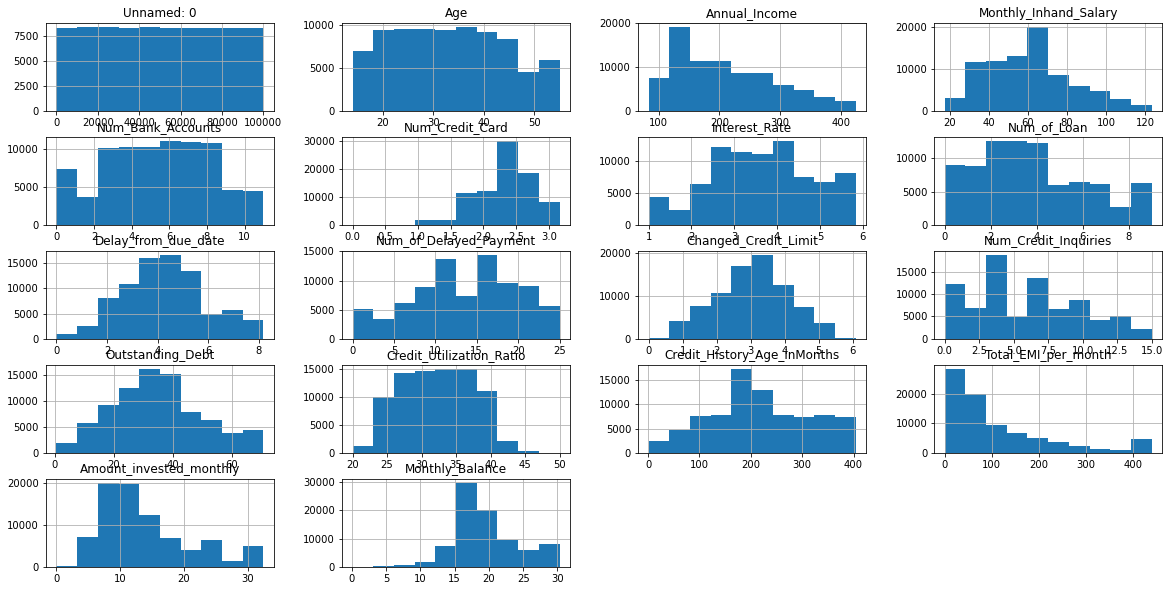

In [313]:
#Univarient Analysis
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.gca()
df.hist(ax = ax1)
plt.show()

c:\Users\91900\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

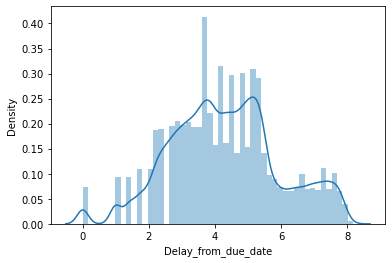

In [314]:
sns.distplot(df.Delay_from_due_date) 

c:\Users\91900\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Density'>

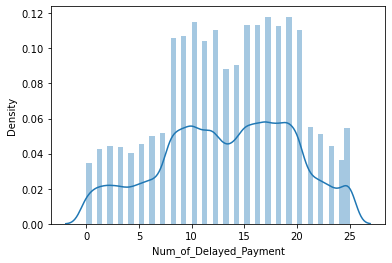

In [315]:
sns.distplot(df.Num_of_Delayed_Payment) 

c:\Users\91900\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Density'>

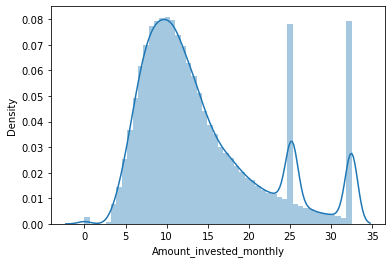

In [316]:
sns.distplot(df.Amount_invested_monthly) 

In [318]:
#Dropping Unwanted Columns
df=df.drop(['Unnamed: 0','ID','Customer_ID','Name','SSN'],axis=1)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83068 entries, 0 to 89374
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        83068 non-null  object 
 1   Age                          83068 non-null  int64  
 2   Occupation                   83068 non-null  object 
 3   Annual_Income                83068 non-null  float64
 4   Monthly_Inhand_Salary        83068 non-null  float64
 5   Num_Bank_Accounts            83068 non-null  int64  
 6   Num_Credit_Card              83068 non-null  float64
 7   Interest_Rate                83068 non-null  float64
 8   Num_of_Loan                  83068 non-null  int64  
 9   Type_of_Loan                 83068 non-null  object 
 10  Delay_from_due_date          83068 non-null  float64
 11  Num_of_Delayed_Payment       83068 non-null  float64
 12  Changed_Credit_Limit         83068 non-null  float64
 13  Num_Credit_Inqui

In [320]:
#Going to model

In [321]:
x=df.iloc[:,:-1]
y=df['Credit_Score']

In [322]:
print(y.value_counts())

Standard    44206
Poor        24127
Good        14735
Name: Credit_Score, dtype: int64


In [323]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [324]:

import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


column_transformer = ColumnTransformer([
    ('target_enc', ce.TargetEncoder(), ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_History_Age_inMonths', 'Payment_Behaviour']),
    ('scaler', StandardScaler(), ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                                  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'])    
])

pipeline = Pipeline([
    ('preprocess', column_transformer),
     
])
x_train=pipeline.fit_transform(x,y)
column_names = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_History_Age_inMonths', 'Payment_Behaviour','Age', 'Annual_Income', 
                'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
                                  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
df= pd.DataFrame(x_train, columns=column_names)

df.head()



,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Credit_History_Age_inMonths,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1.397367,1.344156,1.180605,1.557625,1.101557,265.0,1.358665,-0.954999,-0.877537,-0.842774,...,0.095782,-1.554334,-1.014504,0.282597,-0.458657,-0.405351,-1.069298,-0.541944,-0.700492,-0.376139
1,1.332106,1.344156,1.180605,0.870454,1.101557,268.0,1.384623,-0.954999,-0.877537,0.172204,...,0.095782,-1.247952,-1.494680,-0.515626,-0.458657,-0.405351,-0.179057,-0.541944,0.007920,-0.942993
2,1.328370,1.344156,1.180605,0.870454,1.101557,270.0,1.346313,-0.954999,-0.877537,0.172204,...,0.095782,-0.887868,-1.494680,-0.009726,-0.458657,-0.405351,-0.983379,-0.541944,-0.846995,-0.215261
3,1.324280,1.344156,1.180605,0.870454,1.101557,271.0,1.384623,-0.954999,-0.877537,-0.842774,...,0.095782,-1.554334,-0.854446,0.282597,-0.458657,-0.405351,-1.906731,-0.541944,-0.097666,-0.799619
4,1.332950,1.344156,1.180605,0.870454,1.101557,189.0,1.344088,-0.954999,-0.877537,-0.842774,...,0.095782,-1.554334,-1.174563,0.282597,-0.458657,-0.405351,-1.633868,-0.541944,-1.248614,-0.117208


In [325]:
x=df

In [326]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1]:
'''''
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5],
    'learning_rate': [0.1],
    'n_estimators': [300],
    'min_child_weight': [2],
}
# Create an XGBoost classifier
xgb_model = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set
y_pred = best_model.predict(x_test)
print(classification_report(y_pred,y_test))
print(best_params)
'''

"''\nfrom sklearn.model_selection import train_test_split, GridSearchCV\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\n    'max_depth': [5],\n    'learning_rate': [0.1],\n    'n_estimators': [300],\n    'min_child_weight': [2],\n}\n# Create an XGBoost classifier\nxgb_model = XGBClassifier()\n\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1_macro')\ngrid_search.fit(x_train, y_train)\n\n# Get the best model and its parameters\nbest_model = grid_search.best_estimator_\nbest_params = grid_search.best_params_\n\n# Make predictions on the validation set\ny_pred = best_model.predict(x_test)\nprint(classification_report(y_pred,y_test))\nprint(best_params)\n"

In [ ]:
print(len(y_test))

16614


In [328]:
'''''
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
print(classification_report(y_pred,y_test))


accuracy_test = accuracy_score(y_test, y_pred)
confusion_mat_test = confusion_matrix(y_test, y_pred)
print(accuracy_test)
print(confusion_mat_test)
'''

"''\nfrom xgboost import XGBClassifier\nxgb_model = XGBClassifier()\nxgb_model.fit(x_train,y_train)\ny_pred=xgb_model.predict(x_test)\nprint(classification_report(y_pred,y_test))\n\n\naccuracy_test = accuracy_score(y_test, y_pred)\nconfusion_mat_test = confusion_matrix(y_test, y_pred)\nprint(accuracy_test)\nprint(confusion_mat_test)\n"

In [331]:

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=200,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.5,
                              max_depth=50)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print(classification_report(y_pred,y_test))

accuracy_test = accuracy_score(y_test, y_pred)
confusion_mat_test = confusion_matrix(y_test, y_pred)

print(accuracy_test)
print(confusion_mat_test)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2929
           1       0.83      0.82      0.83      4962
           2       0.83      0.84      0.83      8723

    accuracy                           0.82     16614
   macro avg       0.80      0.80      0.80     16614
weighted avg       0.82      0.82      0.82     16614

0.815517033826893
[[2171   33  709]
 [ 101 4080  716]
 [ 657  849 7298]]


In [ ]:
import pickle
with open('model.pkl','wb') as file1:
    pickle.dump(rf,file1)